In [3]:
In [1]: %load_ext autoreload

In [2]: %autoreload 2

In [97]:
import preproc_RNN_LSTM
import pandas as pd
import plot_evaluate_models
import matplotlib.pyplot as plt
from metrics import get_baseline_data
import numpy as np
import math
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.layers import TimeDistributed, Dropout, BatchNormalization
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from baseline import get_baseline_actual, get_baseline_predictions, forecast_accuracy

# Import imput data

In [5]:
data = preproc_RNN_LSTM.get_baseline_data("raw_data/preproc_data_rate.csv")


# Set parameters

In [157]:
n_sequences=4000
length=150
prediction_horizon = 20

# Modelling

## set training and test set

In [168]:
X_train, y_train, X_test, y_test = preproc_RNN_LSTM.get_train_test(data,n_sequences,length, prediction_horizon)

## define model

In [169]:
#model1 = preproc_RNN_LSTM.model(n_sequences, length-prediction_horizon, 30, prediction_horizon)

model1 = models.Sequential()
model1.add(layers.LSTM(128, return_sequences=False, activation="tanh", \
    input_shape = (length-prediction_horizon, 30)))
model1.add(layers.RepeatVector(prediction_horizon))
#model.add(Dropout(0.4))
model1.add(layers.LSTM(40, return_sequences=True, activation="tanh"))
# added 
#model.add(BatchNormalization())
#model.add(Dropout(0.4))
model1.add(layers.TimeDistributed(layers.Dense(30,"relu")))
model1.compile(loss="mse",
            optimizer="rmsprop")

## train model

In [170]:
#preproc_RNN_LSTM.fit_model(X_train, y_train, model1)
es = EarlyStopping(monitor='val_loss', verbose=1, patience=20, restore_best_weights=True)
hist = model1.fit(X_train, y_train, 
                 callbacks=[es],
                 epochs = 2000,
                 validation_split =0.3, 
                 batch_size=16
                )

Epoch 1/2000
175/175 [==============================] - 9s 42ms/step - loss: 0.0486 - val_loss: 0.0466
Epoch 2/2000
175/175 [==============================] - 7s 38ms/step - loss: 0.0450 - val_loss: 0.0448
Epoch 3/2000
175/175 [==============================] - 7s 38ms/step - loss: 0.0441 - val_loss: 0.0440
Epoch 4/2000
175/175 [==============================] - 7s 38ms/step - loss: 0.0419 - val_loss: 0.0420
Epoch 5/2000
175/175 [==============================] - 7s 41ms/step - loss: 0.0408 - val_loss: 0.0463
Epoch 6/2000
175/175 [==============================] - 7s 39ms/step - loss: 0.0409 - val_loss: 0.0439
Epoch 7/2000
175/175 [==============================] - 7s 39ms/step - loss: 0.0404 - val_loss: 0.0424
Epoch 8/2000
175/175 [==============================] - 7s 38ms/step - loss: 0.0392 - val_loss: 0.0394
Epoch 9/2000
175/175 [==============================] - 7s 39ms/step - loss: 0.0390 - val_loss: 0.0387
Epoch 10/2000
175/175 [==============================] - 7s 38ms/step - l

Epoch 80/2000
175/175 [==============================] - 7s 37ms/step - loss: 0.0180 - val_loss: 0.0205
Epoch 81/2000
175/175 [==============================] - 7s 37ms/step - loss: 0.0179 - val_loss: 0.0217
Epoch 82/2000
175/175 [==============================] - 7s 39ms/step - loss: 0.0175 - val_loss: 0.0210
Epoch 83/2000
175/175 [==============================] - 7s 37ms/step - loss: 0.0172 - val_loss: 0.0200
Epoch 84/2000
175/175 [==============================] - 8s 44ms/step - loss: 0.0178 - val_loss: 0.0222
Epoch 85/2000
175/175 [==============================] - 7s 42ms/step - loss: 0.0169 - val_loss: 0.0188
Epoch 86/2000
175/175 [==============================] - 7s 39ms/step - loss: 0.0166 - val_loss: 0.0208
Epoch 87/2000
175/175 [==============================] - 7s 39ms/step - loss: 0.0176 - val_loss: 0.0196
Epoch 88/2000
175/175 [==============================] - 7s 38ms/step - loss: 0.0175 - val_loss: 0.0200
Epoch 89/2000
175/175 [==============================] - 7s 38ms

175/175 [==============================] - 7s 37ms/step - loss: 0.0125 - val_loss: 0.0168
Epoch 159/2000
175/175 [==============================] - 7s 37ms/step - loss: 0.0113 - val_loss: 0.0152
Epoch 160/2000
175/175 [==============================] - 6s 37ms/step - loss: 0.0124 - val_loss: 0.0149
Epoch 161/2000
175/175 [==============================] - 6s 37ms/step - loss: 0.0114 - val_loss: 0.0148
Epoch 162/2000
175/175 [==============================] - 7s 37ms/step - loss: 0.0117 - val_loss: 0.0160
Epoch 163/2000
175/175 [==============================] - 6s 37ms/step - loss: 0.0113 - val_loss: 0.0143
Epoch 164/2000
175/175 [==============================] - 7s 37ms/step - loss: 0.0117 - val_loss: 0.0133
Epoch 165/2000
175/175 [==============================] - 6s 37ms/step - loss: 0.0112 - val_loss: 0.0134
Epoch 166/2000
175/175 [==============================] - 7s 38ms/step - loss: 0.0116 - val_loss: 0.0128
Epoch 167/2000
175/175 [==============================] - 6s 37ms/step

# Check outputs

## Check validation set

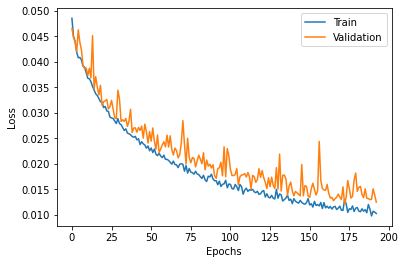

In [171]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'])
plt.show()

## Check predicted vs actual on test set

/Users/desireepetrilli/Documents/event-forecast-rio/baseline.py:19: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  baseline_mean = baseline_data.mean().to_frame().T


Prediction MSE (computed on test set):0.0853791123861838
Baseline MSE (computed on test set):0.03993160741908361


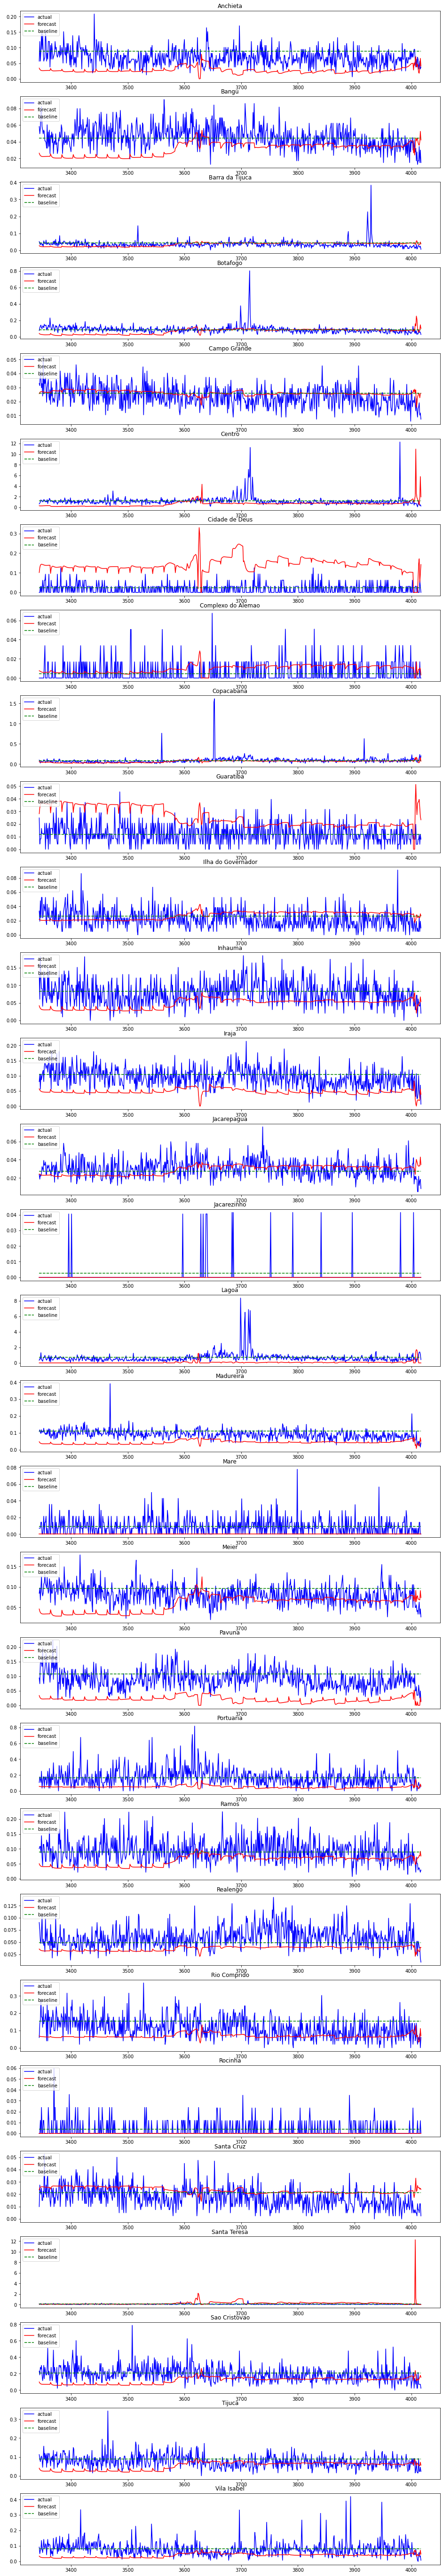

In [190]:
y_pred_df = plot_evaluate_models.compute_plot_pred_multi(data,hist.model,length, prediction_horizon)

# Compare to baseline

In [123]:
actual = get_baseline_actual(data).drop(columns="Date")

In [124]:
baseline = get_baseline_predictions(data)

In [125]:
forecast_accuracy(actual,baseline)

{'mse': 0.05266306588502226,
 'mae': 0.049240814256642985,
 'corr': 0.9999999999999999}

# Check function


In [178]:
data_wo_date = data.drop(columns="Date")
len_ = int(0.8*data_wo_date.shape[0])
data_test = data_wo_date[len_:]


In [179]:
y_pred= []

In [180]:
int((804-(length-prediction_horizon))/prediction_horizon)+1

34

In [185]:
i = 0
data_test_temp = data_wo_date[i*prediction_horizon:i*prediction_horizon+(length-prediction_horizon)]
data_test_temp = np.array(data_test_temp)
data_test_temp = data_test_temp.reshape(1,(length-prediction_horizon),30)
y_pred_temp = model1.predict(data_test_temp).tolist()[0]
#y_pred = y_pred + y_pred_temp

In [188]:
data_test_temp.shape

(1, 130, 30)